# Credit-Line | EDA | Equifax признаки

- [Анализ пропусков](#Анализ-пропусков)
- [Анализ распределений](#Анализ-распределений)
- [Корреляции](#Корреляции)

## TODO:
- дропаем все

In [9]:
import sys
sys.path.append('..')
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns

import utils
from utils.eda import num_feature_report
# from utils.eda import plot_pies
from utils.eda import cat_feature_report

In [10]:
DATA = os.path.join('..', 'data', 'raw', 'raw.csv')
# NEW_DATA = os.path.join('..', 'data', 'raw', 'new_raw.csv')

In [35]:
cols_to_drop = []

In [45]:
equifax = pd.read_csv(
    DATA,
    index_col='AppId',
    parse_dates=['dtstart', 'Timestamp_eq', 'Recent_account_date_eq', 'Oldest_account_date_eq'],
    usecols=[
        'AppId',
        'dtstart',

        "Timestamp_eq",
        "Recent_account_date_eq",
        "Oldest_account_date_eq",  
        'Total_accounts_ever',
        'Total_active_accounts_eq',
        'Total_credit_limit_active_eq',
        'Total_outstanding_amount_eq',
        'Total_overdue_amount_eq',
        'Total_pay_amount',
        'Total_pay_amount_non_card',
        'Payment_cards',
        'Total_bankruptcy_eq',
        'Total_letigation_eq',
        'current_120DPD_3K_flag',
        'Nb_delays_5_30_ever_eq',
        'Nb_delays_30_60_ever_eq',
        'Nb_delays_60_90_ever_eq',
        'Nb_delays_90plus_ever_eq',
        'Nb_delays_5_30_2y_eq',
        'Nb_delays_30_60_2y_eq',
        'Nb_delays_60_90_2y_eq',
        'Nb_delays_90plus_2y_eq',
        'Max_overdue_eq',
        'RCC_credit_limit_eq',
        'RCC_overdue_amount_eq',
        'Nb_active_consumer_credit_eq',
        'Nb_active_rcc_eq',
        'Nb_active_mortgages_eq',
        'Nb_microcredits_ever',
        'CH_length_eq',
        'Nb_active_microcredits_eq',
        'S_hare_active_credit',
        'S_hare_micro', 
        
        '60_6mob',
    ],
)

equifax = equifax.query('"2021-08-01" <= dtstart < "2023-04-01"')
equifax['60_6mob'] = equifax['60_6mob'].apply(lambda x: 0 if str(x) == '0.0' else 1)

In [46]:
equifax.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 13863 entries, 1817111 to 1912560
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   dtstart                       13863 non-null  datetime64[ns]
 1   Timestamp_eq                  10916 non-null  datetime64[ns]
 2   Total_accounts_ever           3619 non-null   float64       
 3   Total_active_accounts_eq      3619 non-null   float64       
 4   Total_credit_limit_active_eq  3619 non-null   float64       
 5   Total_outstanding_amount_eq   3619 non-null   float64       
 6   Total_overdue_amount_eq       3619 non-null   float64       
 7   Total_pay_amount              3619 non-null   float64       
 8   Total_pay_amount_non_card     3619 non-null   float64       
 9   Payment_cards                 3619 non-null   float64       
 10  Total_bankruptcy_eq           3619 non-null   float64       
 11  Total_letigation_eq      

## Анализ пропусков

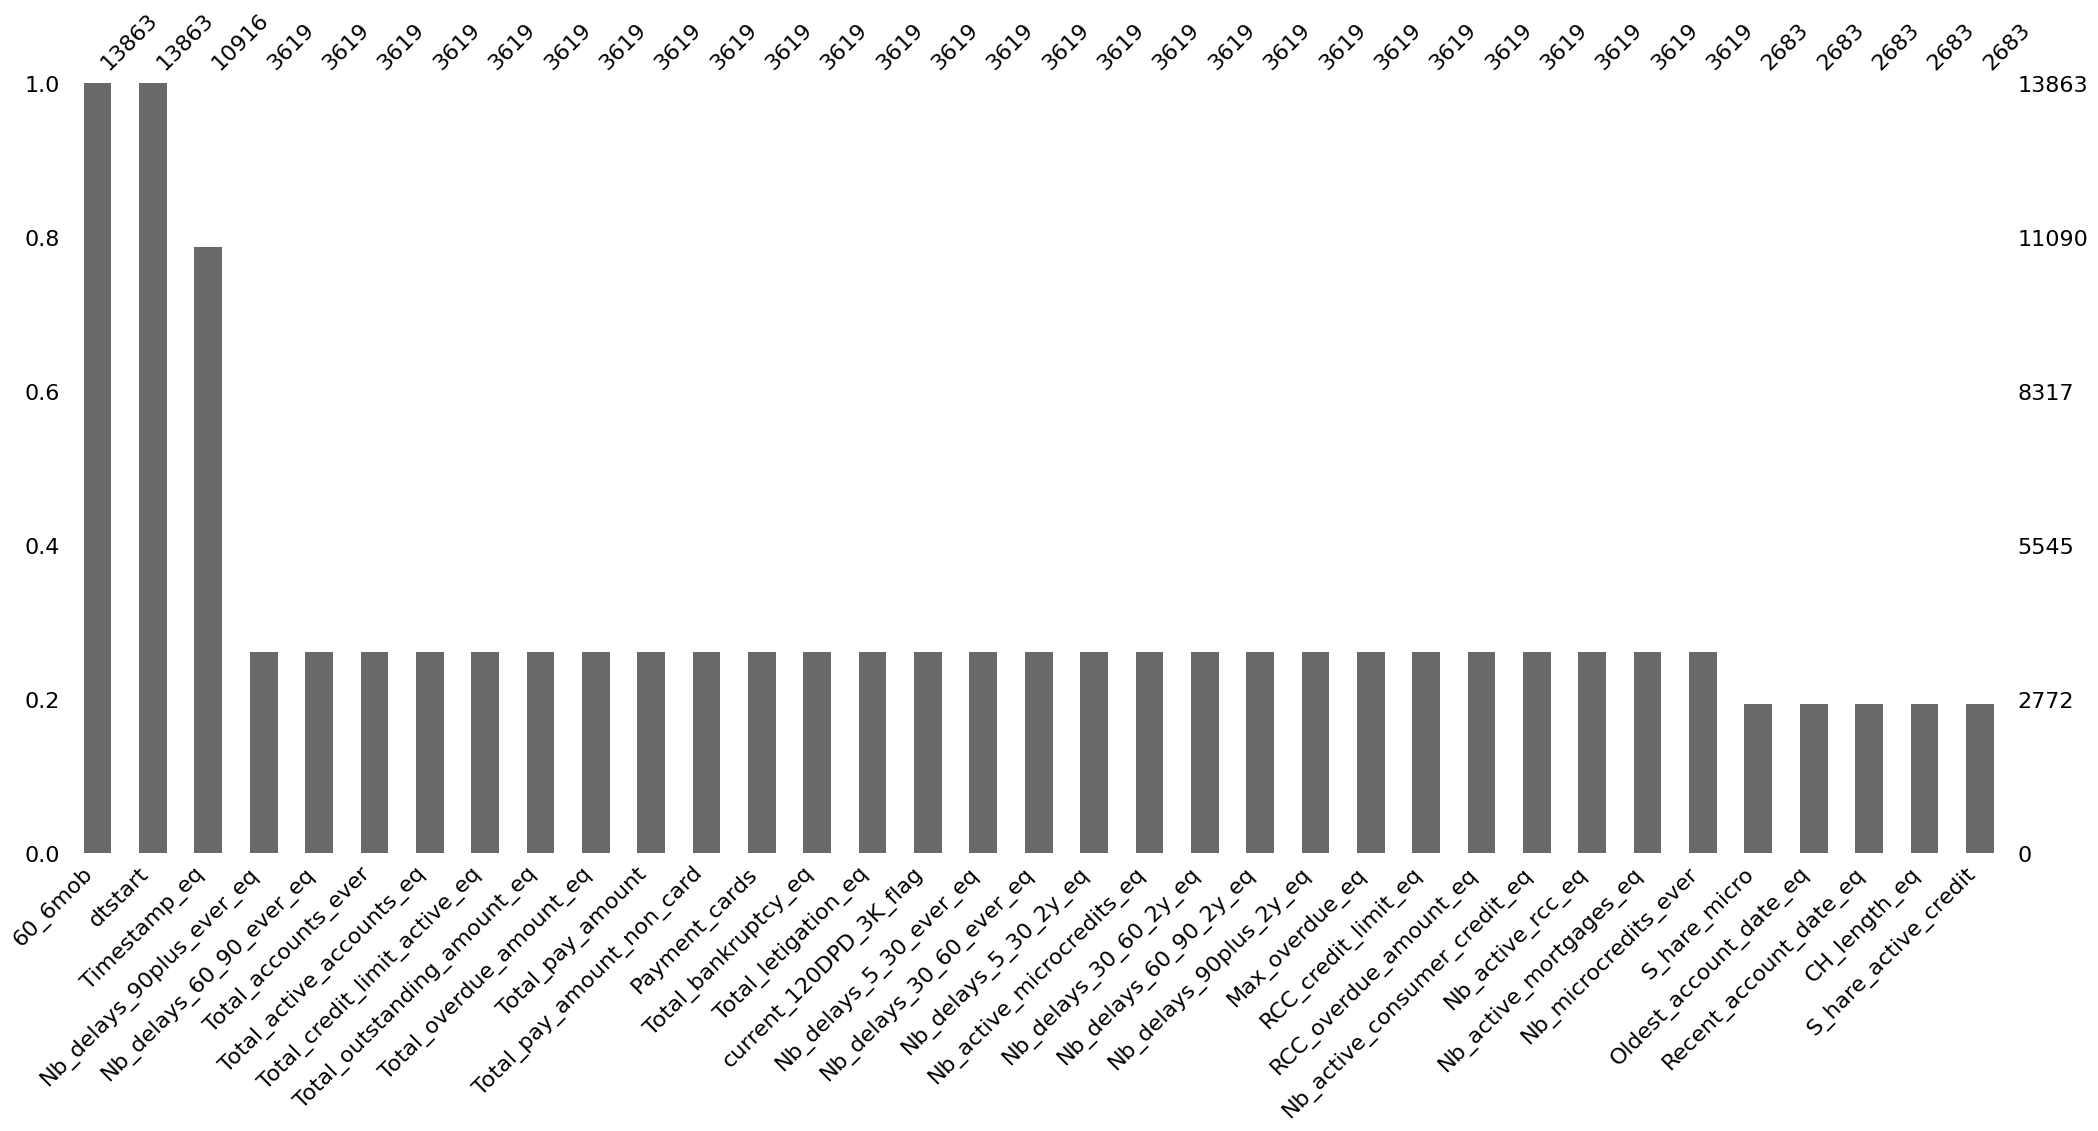

In [47]:
ax = msno.bar(equifax, sort='descending')

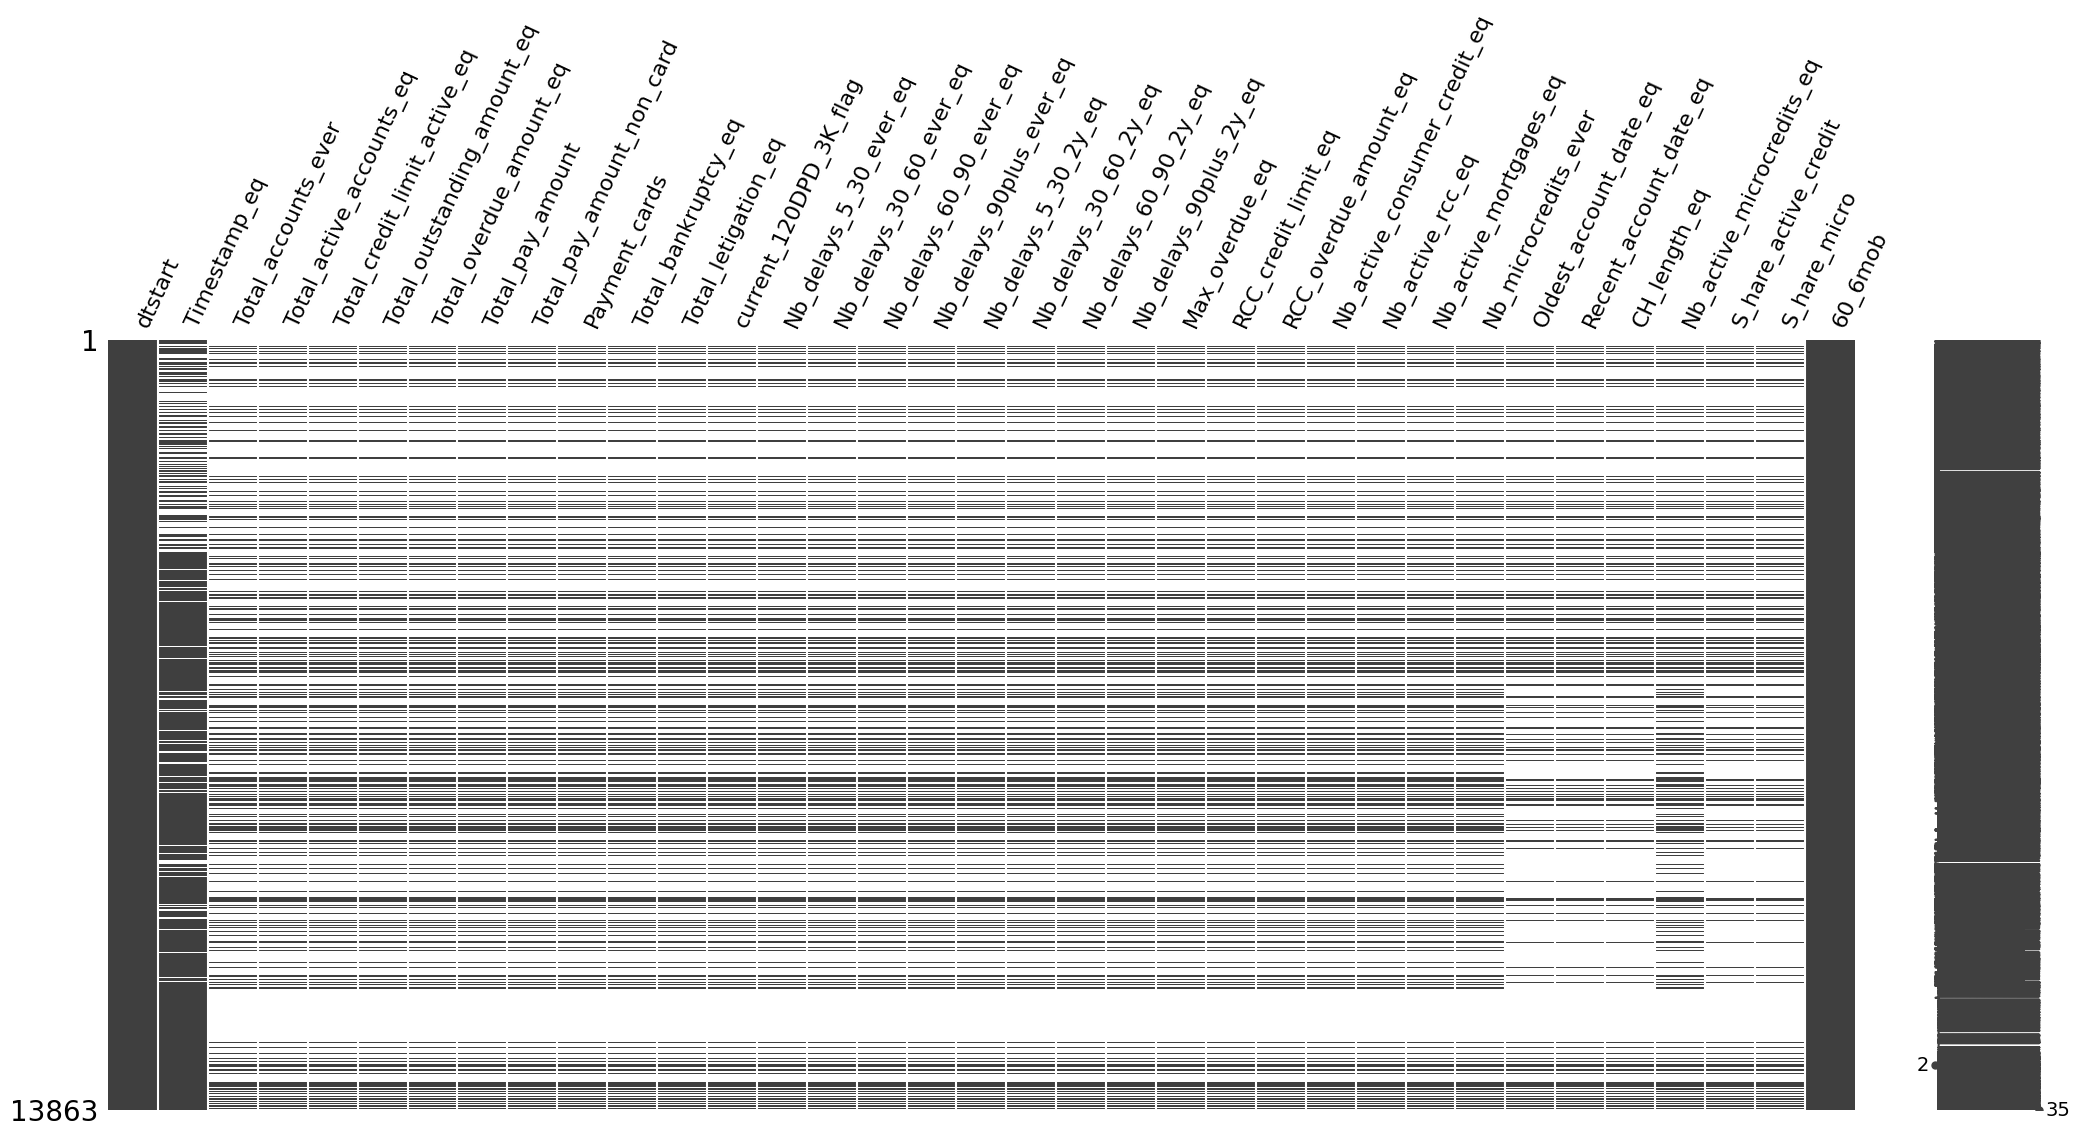

In [48]:
ax = msno.matrix(equifax.sort_values('dtstart'), label_rotation=65)

## Анализ распределений

### `Timestamp_eq`

In [50]:
equifax['Timestamp_eq'].sort_values()

AppId
1523059   2021-07-30 16:12:05.283
1525017   2021-08-01 07:36:12.517
1525228   2021-08-01 11:18:32.870
1525288   2021-08-01 11:54:54.317
1525393   2021-08-01 13:39:25.267
                    ...          
1894763                       NaT
1895053                       NaT
1900107                       NaT
1907813                       NaT
1912560                       NaT
Name: Timestamp_eq, Length: 13863, dtype: datetime64[ns]

### `Oldest_account_date_eq`

In [55]:
equifax['Oldest_account_date_eq'].sort_values()

AppId
1529766   2014-07-17
1880114   2014-07-31
1892499   2014-08-04
1768626   2014-08-19
1831711   2014-09-02
             ...    
1909623          NaT
1910119          NaT
1912165          NaT
1912368          NaT
1912560          NaT
Name: Oldest_account_date_eq, Length: 13863, dtype: datetime64[ns]

### `Recent_account_date_eq`

In [57]:
equifax['Recent_account_date_eq'].sort_values()

AppId
1529766   2014-07-17
1878682   2014-12-18
1526475   2015-06-04
1787702   2015-10-10
1787151   2015-10-13
             ...    
1909623          NaT
1910119          NaT
1912165          NaT
1912368          NaT
1912560          NaT
Name: Recent_account_date_eq, Length: 13863, dtype: datetime64[ns]

### `Total_accounts_ever` - Общее количество счетов за всю историю когда либо	

In [131]:
equifax.query('Total_accounts_ever != 0')['Total_accounts_ever'].notnull().sum()

2678

In [142]:
2060/7766

0.2652588204996137

In [137]:
941 + 2678

3619

In [143]:
2678/10916

0.24532795895932577

In [136]:
equifax.query('Total_accounts_ever == 0')['Total_accounts_ever']

AppId
1743396    0.0
1842824    0.0
2050311    0.0
1861505    0.0
1864029    0.0
          ... 
1893048    0.0
1899997    0.0
1900687    0.0
1901278    0.0
1909093    0.0
Name: Total_accounts_ever, Length: 941, dtype: float64

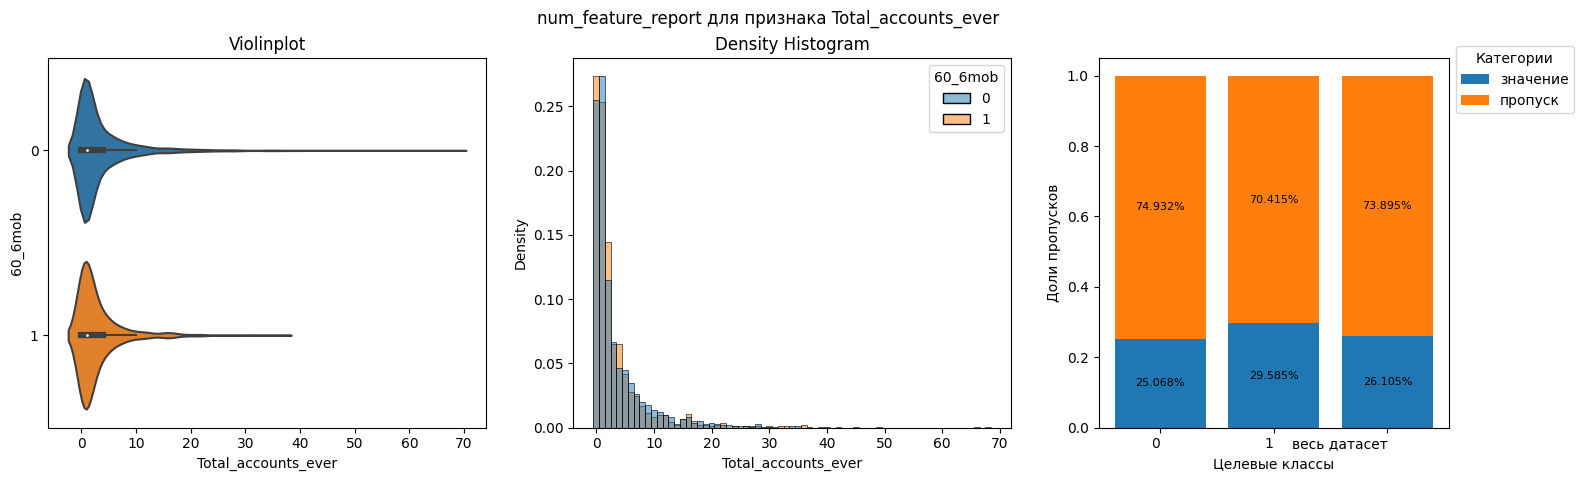

In [19]:
fig, axes = num_feature_report(
    equifax, 
    feature_colname='Total_accounts_ever', 
    target_colname='60_6mob',
    histplot_args={'discrete': True},    
)

### `Total_active_accounts_eq` - Количество активных счетов	

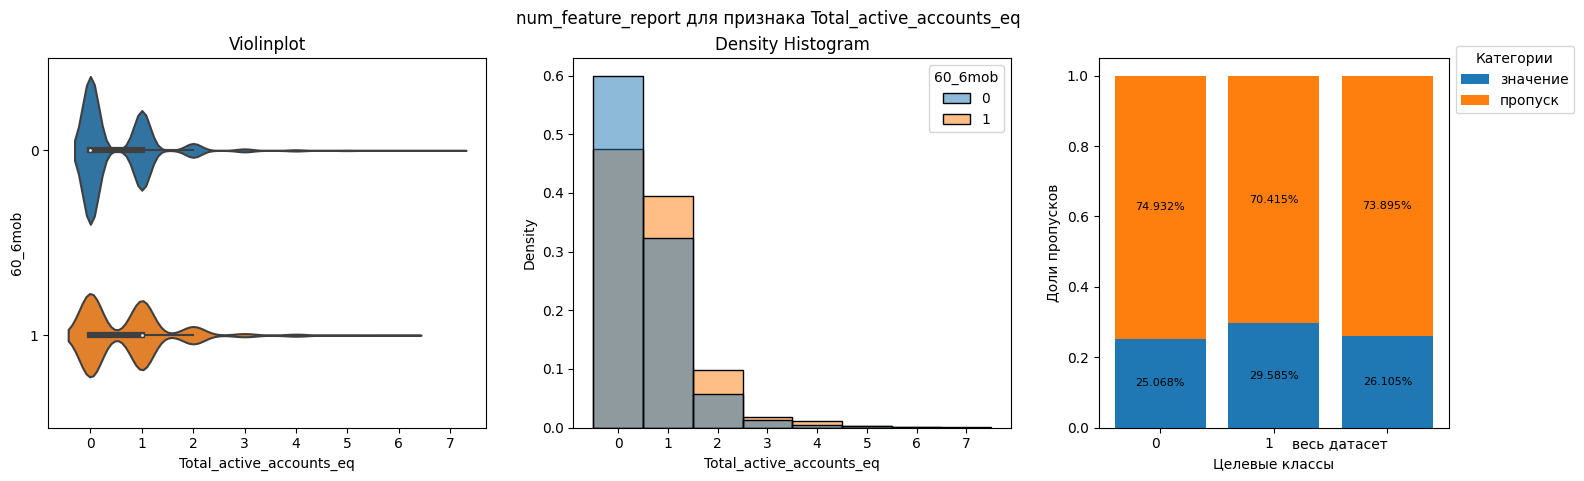

In [18]:
fig, axes = num_feature_report(
    equifax, 
    feature_colname='Total_active_accounts_eq',
    target_colname='60_6mob',
    histplot_args={'discrete': True},
     )

### `Total_credit_limit_active_eq` - Общая сумма кредитов по активным счетам	

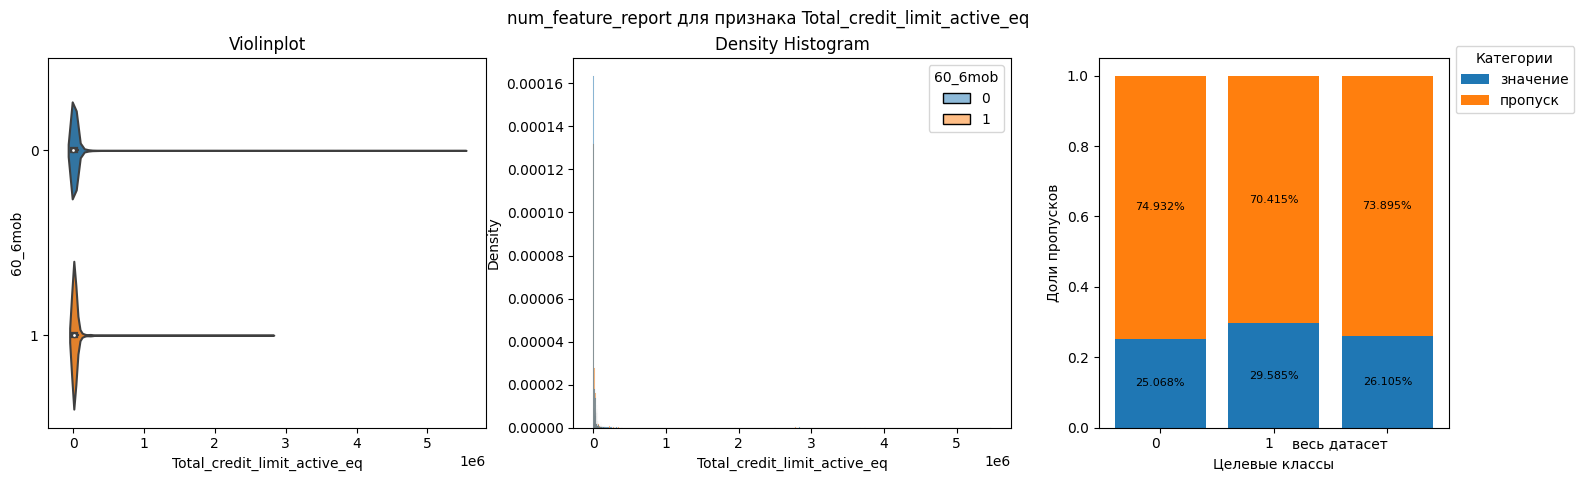

In [20]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='Total_credit_limit_active_eq',
    target_colname='60_6mob',
    # histplot_args={'discrete':True}
)

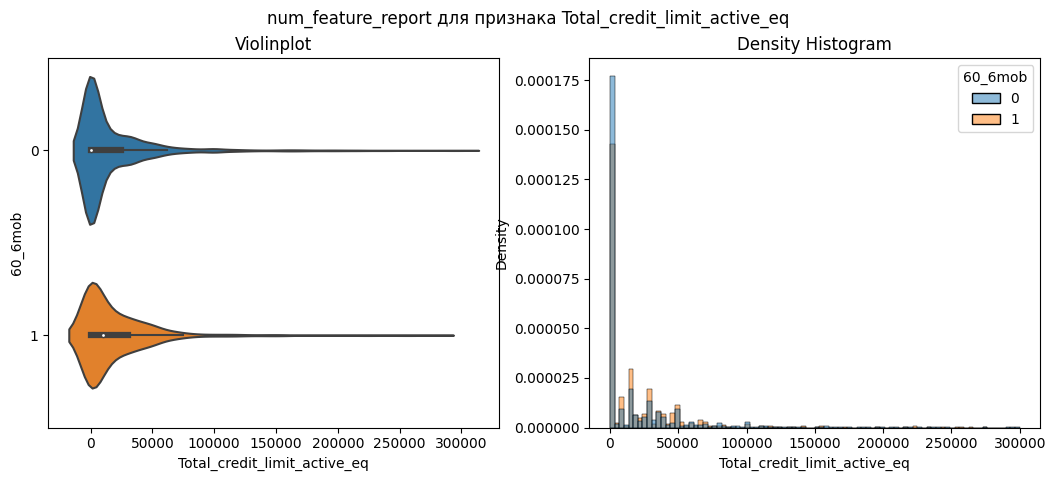

In [22]:
fig, axes = num_feature_report(
    equifax.query('Total_credit_limit_active_eq <= 300_000'),
    feature_colname='Total_credit_limit_active_eq',
    target_colname='60_6mob',
    # histplot_args={'discrete':True}
)

### `Total_outstanding_amount_eq` - Общая сумма задолженности по ОД на данный момент	

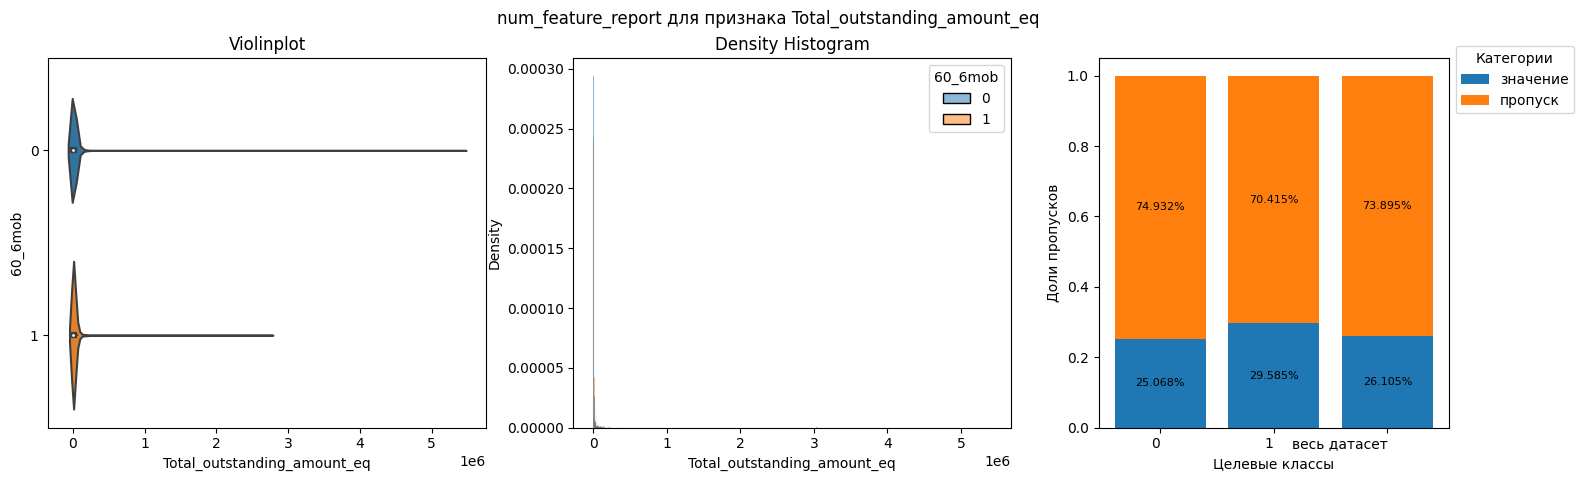

In [23]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='Total_outstanding_amount_eq',
    target_colname='60_6mob',
#     histplot_args={'discrete':True}
)

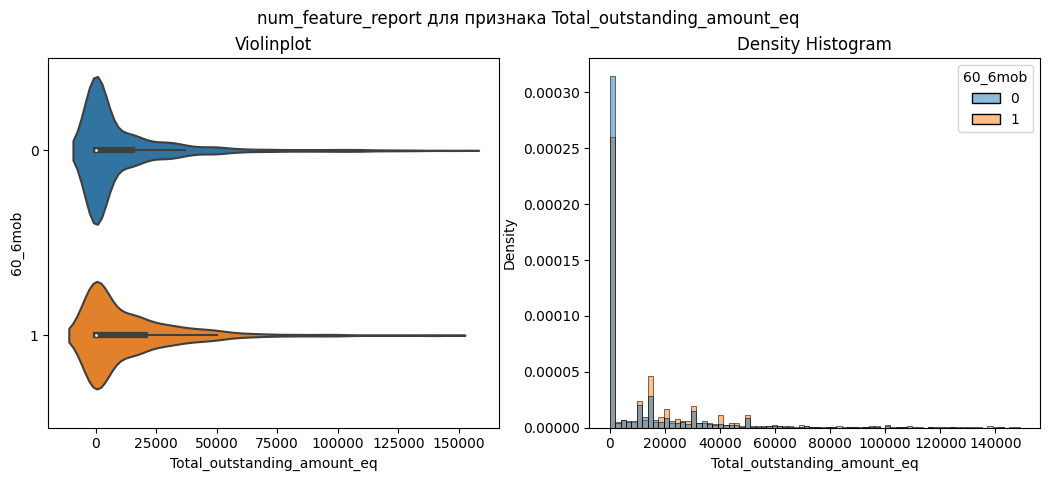

In [24]:
fig, axes = num_feature_report(
    equifax.query('Total_outstanding_amount_eq <= 150_000'),
    feature_colname='Total_outstanding_amount_eq',
    target_colname='60_6mob',
#     histplot_args={'discrete':True}
)

### `Total_overdue_amount_eq` - Текущая просроченная задолженность	

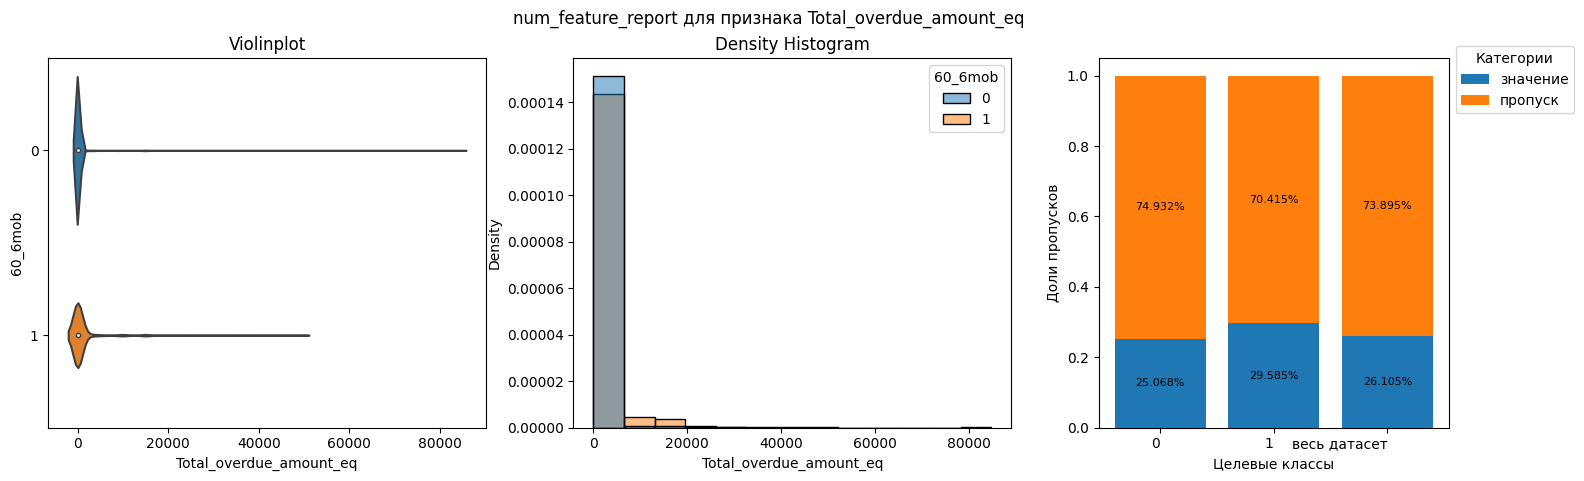

In [25]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='Total_overdue_amount_eq',
    target_colname='60_6mob',
#     histplot_args={'discrete':True}
)

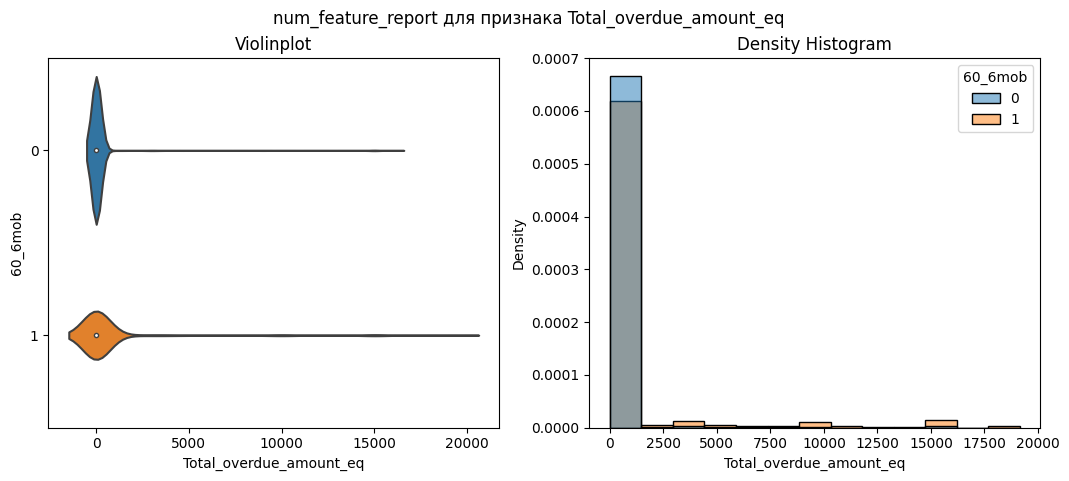

In [28]:
fig, axes = num_feature_report(
    equifax.query('Total_overdue_amount_eq <= 20_000'),
    feature_colname='Total_overdue_amount_eq',
    target_colname='60_6mob',
    # histplot_args={'discrete':True}
)

### `Total_pay_amount` - Общая сумма ежемесячных платежей на данный момент	

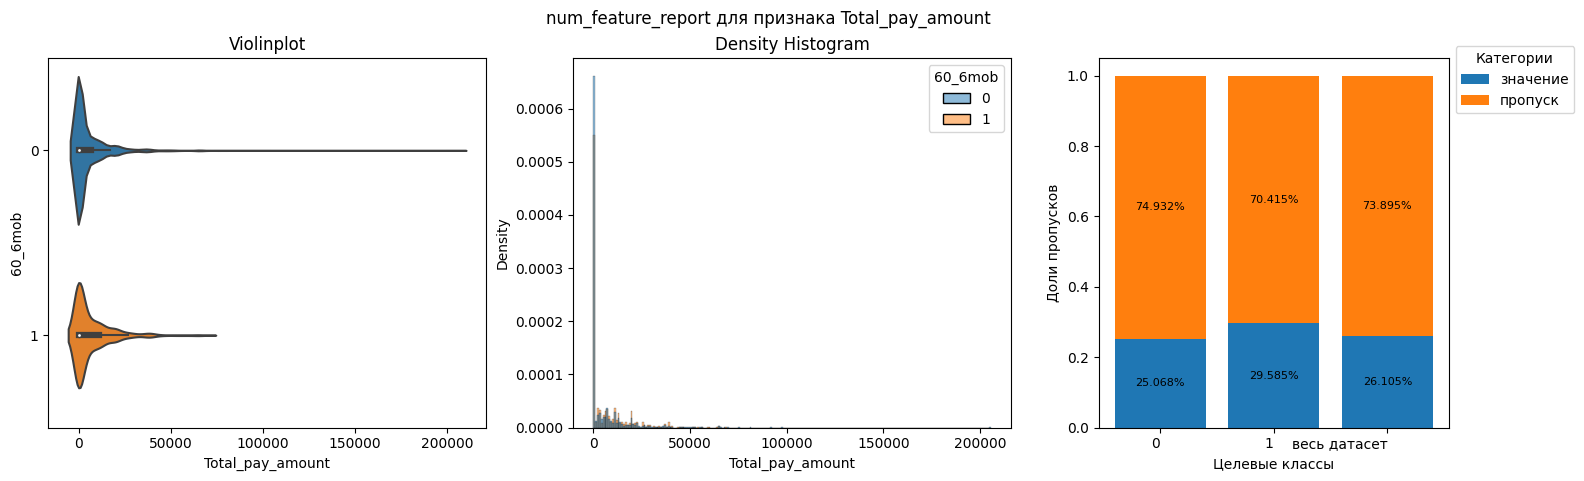

In [29]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='Total_pay_amount',
    target_colname='60_6mob',
#     histplot_args={'discrete':True}
)

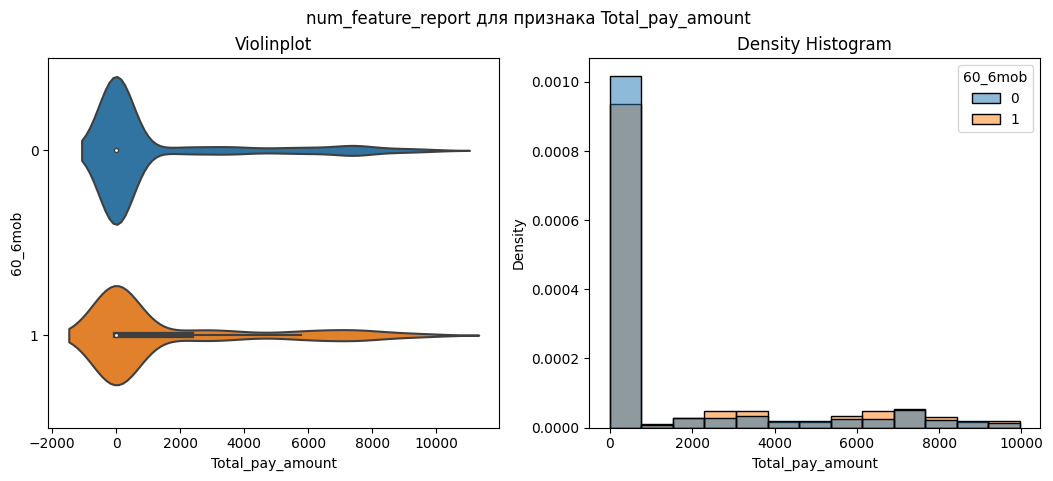

In [30]:
fig, axes = num_feature_report(
    equifax.query('Total_pay_amount <= 10_000'),
    feature_colname='Total_pay_amount',
    target_colname='60_6mob',
#     histplot_args={'discrete':True}
)

### `Total_pay_amount_non_card` - Общая сумма ежемесячных платежей на данный момент без кредитных карт	

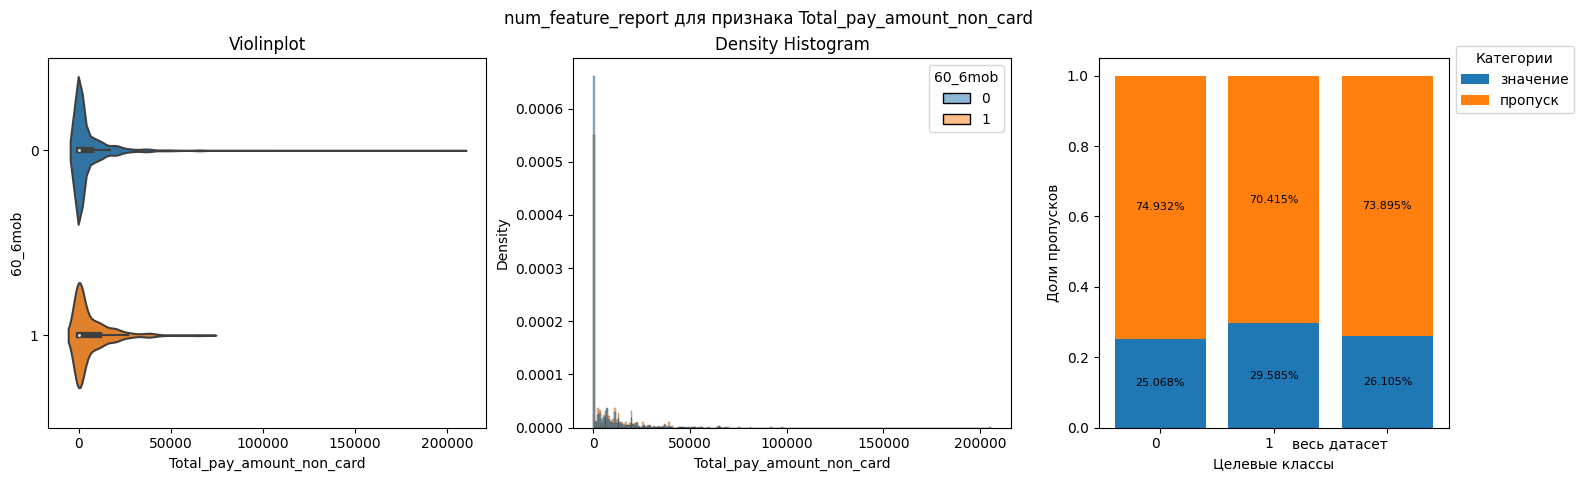

In [31]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='Total_pay_amount_non_card',
    target_colname='60_6mob',
#     histplot_args={'discrete':True}
)

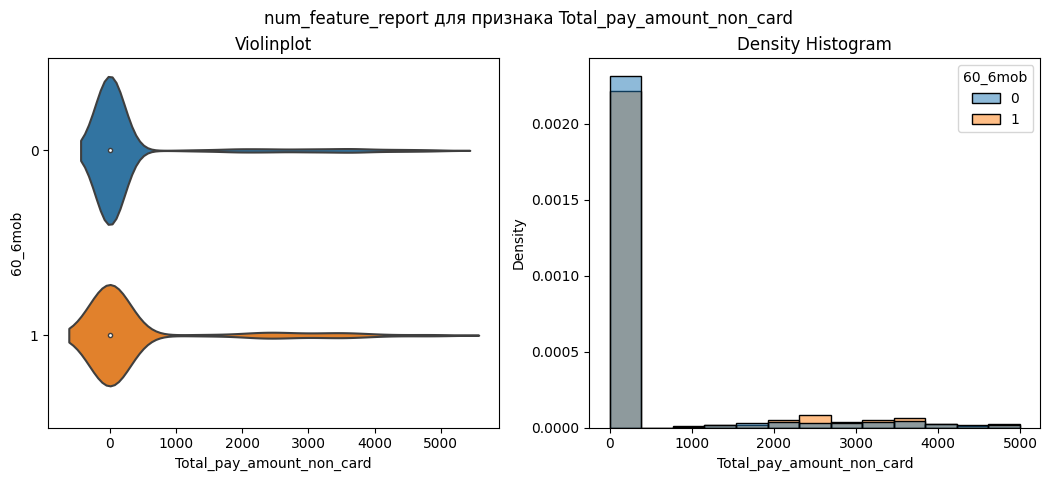

In [32]:
fig, axes = num_feature_report(
    equifax.query('Total_pay_amount_non_card <= 5_000'),
    feature_colname='Total_pay_amount_non_card',
    target_colname='60_6mob',
#     histplot_args={'discrete':True}
)

### `Payment_cards` - Общее количество запросов		

In [34]:
equifax['Payment_cards'].value_counts()

Payment_cards
0.0      3613
750.0       6
Name: count, dtype: int64

In [36]:
cols_to_drop.append('Payment_cards')

### `Total_bankruptcy_eq` - клиент банкрот

In [37]:
equifax['Total_bankruptcy_eq'].value_counts()

Total_bankruptcy_eq
0.0    3619
Name: count, dtype: int64

In [38]:
cols_to_drop.append('Total_bankruptcy_eq')

### `Total_letigation_eq` - количество вынесенных судебных решений у клиента	

In [39]:
equifax['Total_letigation_eq'].value_counts()

Total_letigation_eq
0.0    3617
1.0       2
Name: count, dtype: int64

In [40]:
cols_to_drop.append('Total_letigation_eq')

### `current_120DPD_3K_flag` - флаг текущей просрочки более 120 дней и суммой просроченной задолженности более 3т.р.	

In [59]:
# тоже дропнул бы
equifax['current_120DPD_3K_flag'].value_counts()

current_120DPD_3K_flag
0.0    3613
1.0       6
Name: count, dtype: int64

In [62]:
cols_to_drop.append('current_120DPD_3K_flag')

### `Nb_delays_5_30_ever_eq` - Количество просрочек платежа сроком от 5 до 30 дней за всё время	

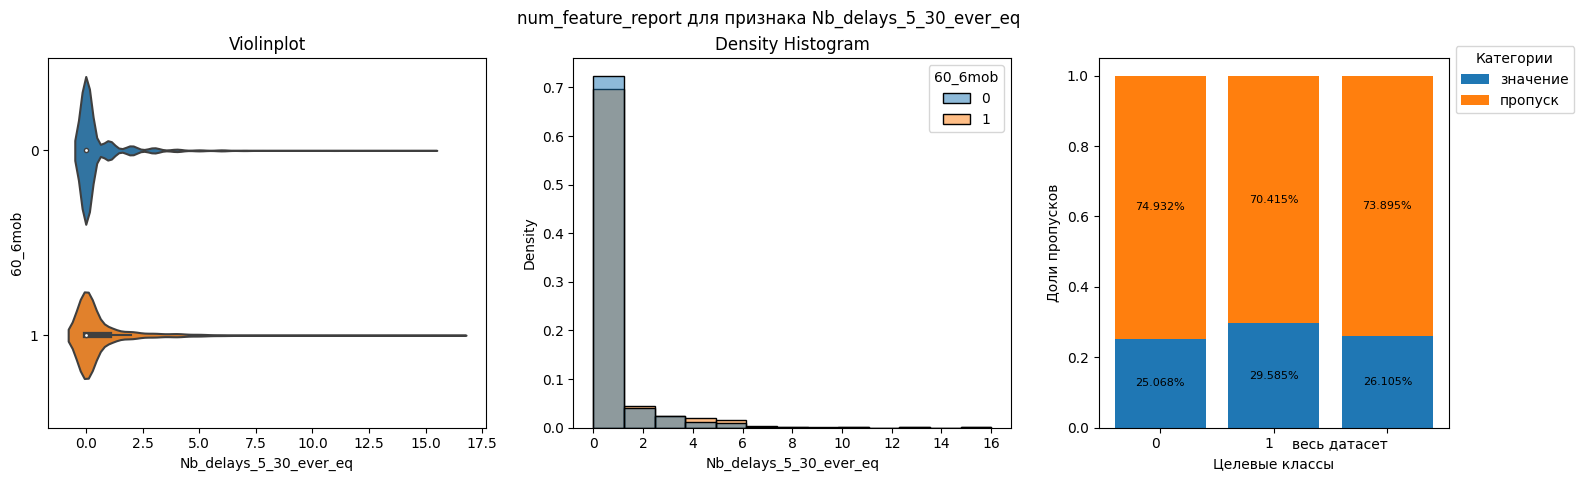

In [69]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='Nb_delays_5_30_ever_eq',
    target_colname='60_6mob',
    # histplot_args={'discrete':True}
)

### `Nb_delays_30_60_ever_eq` - Количество просрочек платежа сроком от 30 до 59 дней за всё время	

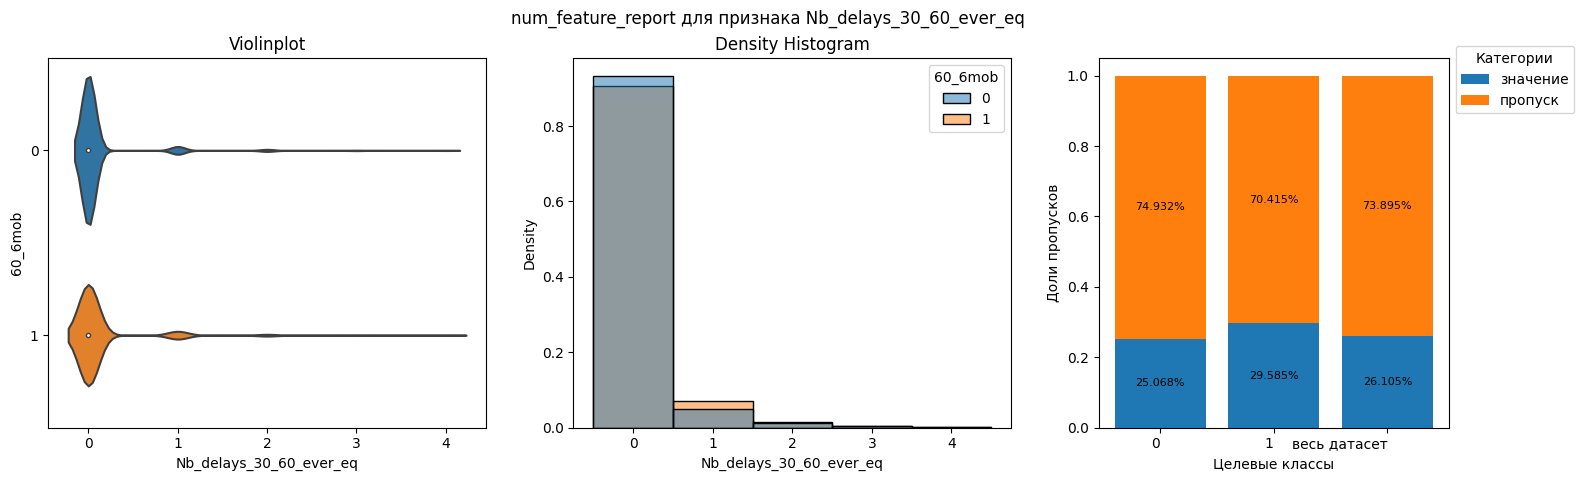

In [67]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='Nb_delays_30_60_ever_eq',
    target_colname='60_6mob',
    histplot_args={'discrete':True}
)

### `Nb_delays_60_90_ever_eq` - Количество просрочек платежа сроком от 60 до 89 дней за всё время	

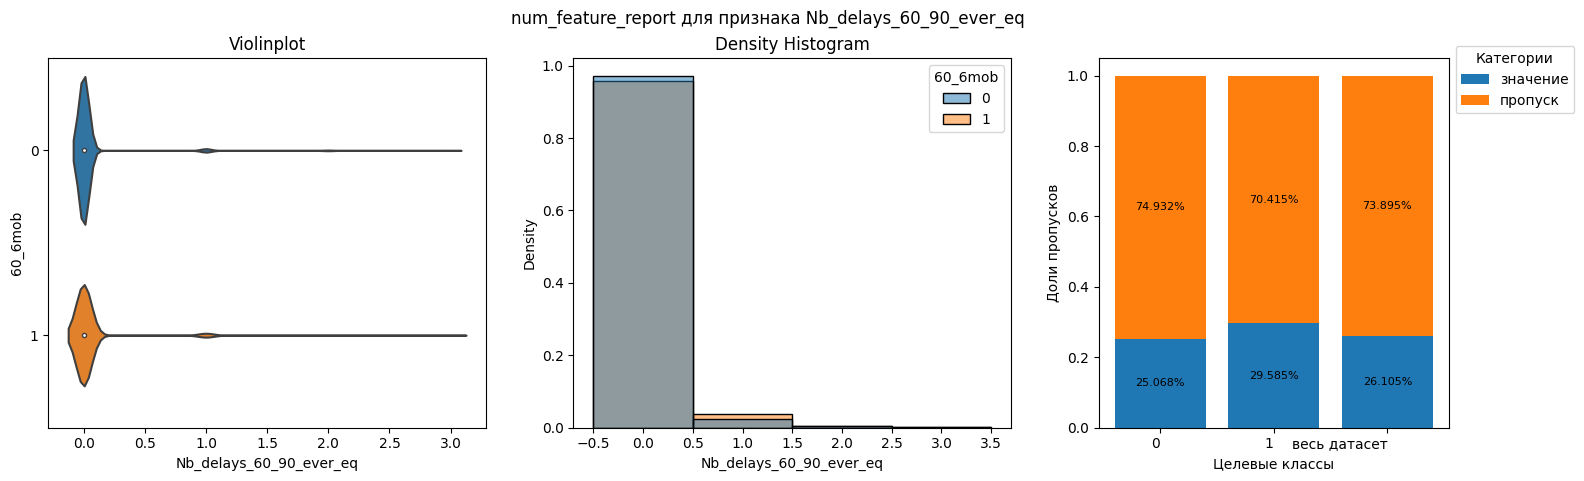

In [66]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='Nb_delays_60_90_ever_eq',
    target_colname='60_6mob',
    histplot_args={'discrete':True}
)

### `Nb_delays_90plus_ever_eq` - Количество просрочек платежа сроком от 90 дней за всё время	

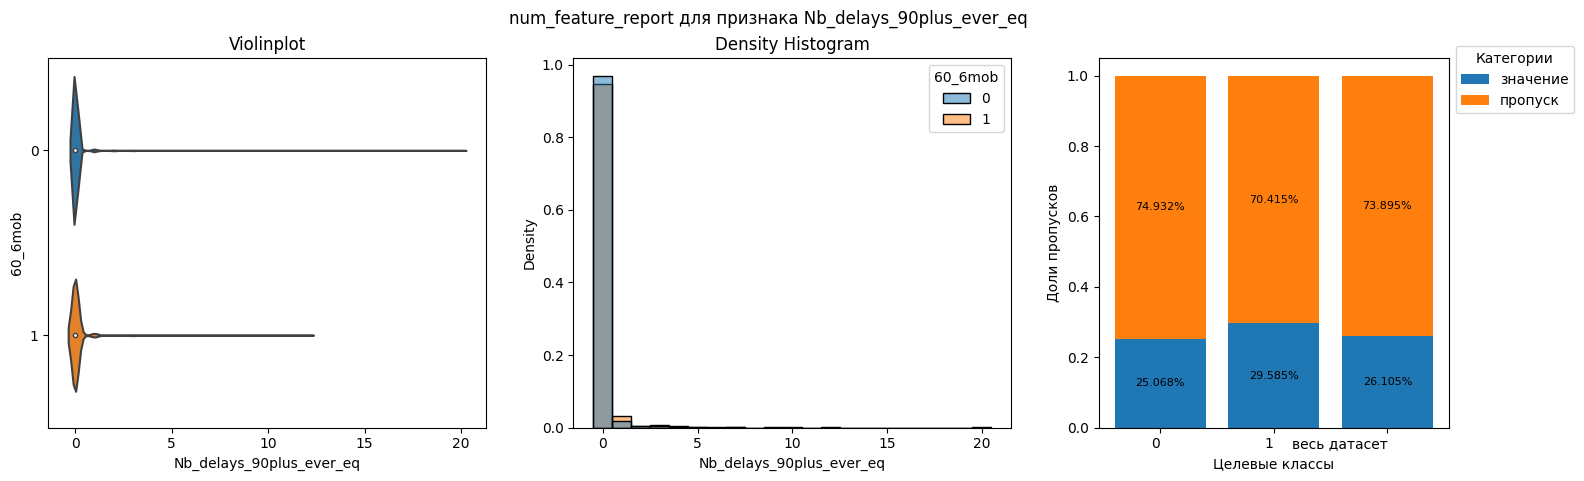

In [70]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='Nb_delays_90plus_ever_eq',
    target_colname='60_6mob',
    histplot_args={'discrete':True}
)

### `Nb_delays_5_30_2y_eq` - Количество просрочек платежа сроком от 5 до 30 дней за последние 2 года	

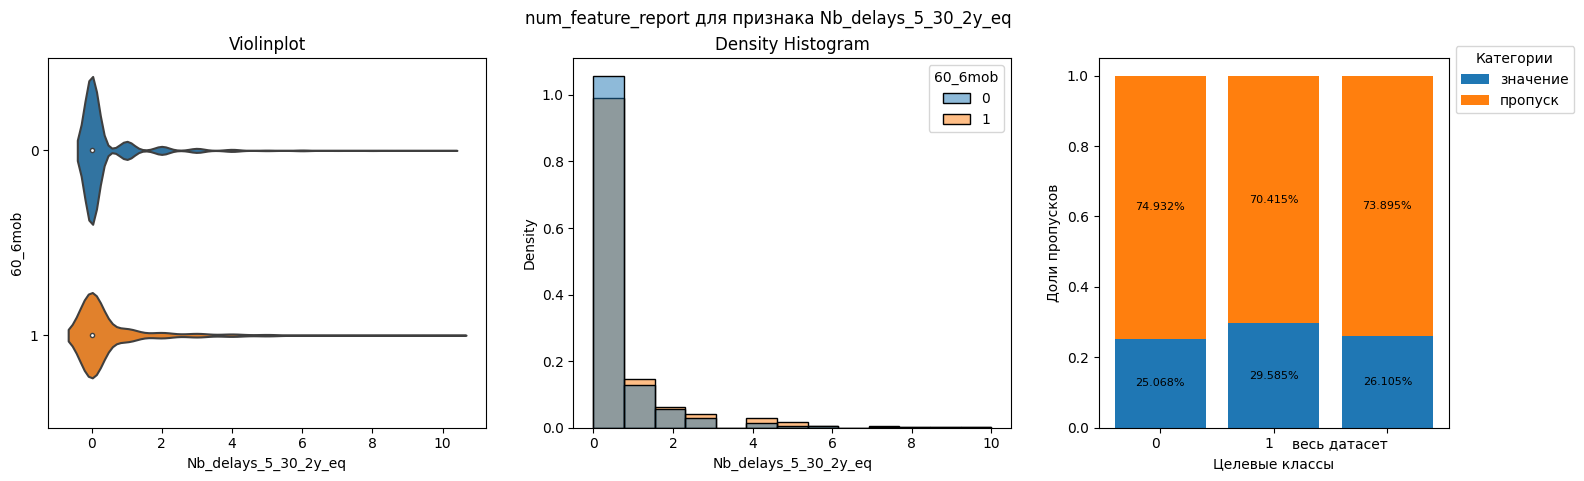

In [71]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='Nb_delays_5_30_2y_eq',
    target_colname='60_6mob',
#     histplot_args={'discrete':True}
)

### `Nb_delays_30_60_2y_eq` - Количество просрочек платежа сроком от 30 до 59 дней за последние 2 года	

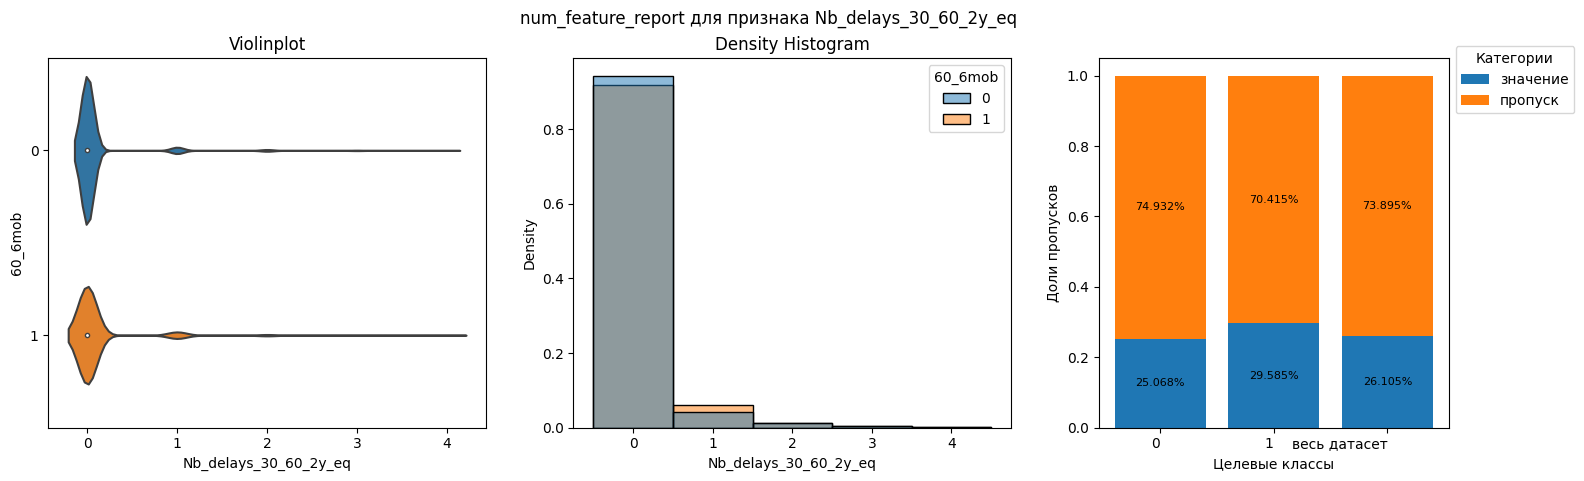

In [72]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='Nb_delays_30_60_2y_eq',
    target_colname='60_6mob',
    histplot_args={'discrete':True}
)

### `Nb_delays_60_90_2y_eq` - Количество просрочек платежа сроком от 60 до 89 дней за последние 2 года		

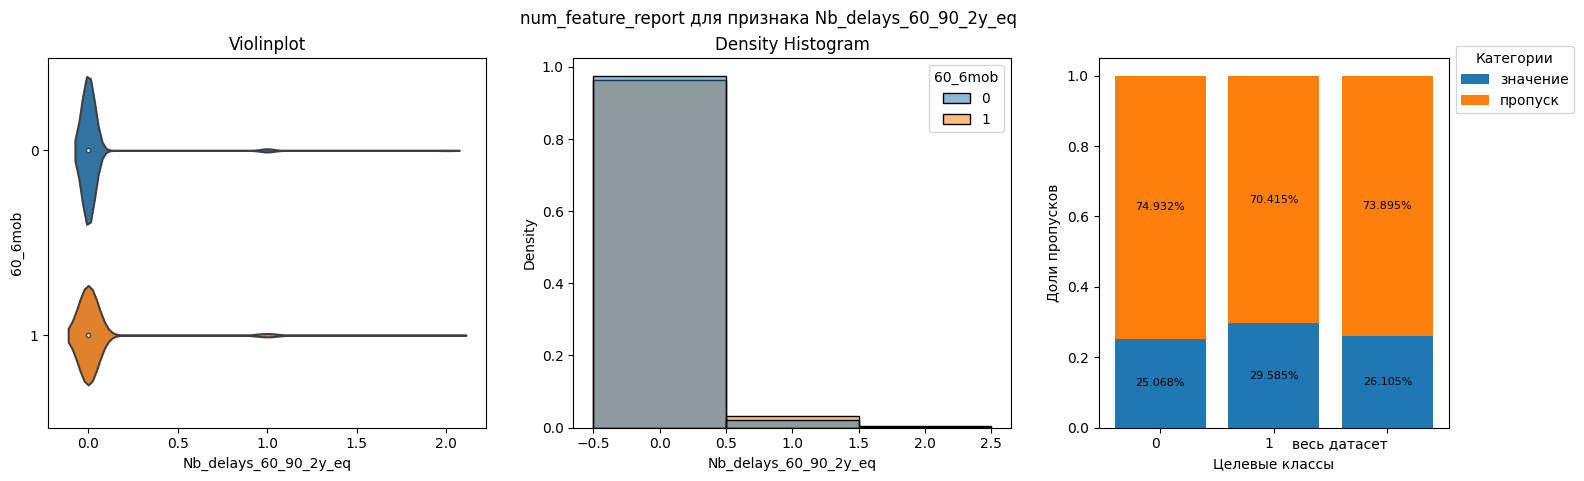

In [73]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='Nb_delays_60_90_2y_eq',
    target_colname='60_6mob',
    histplot_args={'discrete':True}
)

### `Nb_delays_90plus_2y_eq` - Количество просрочек платежа сроком от 90 дней за последние 2 года		

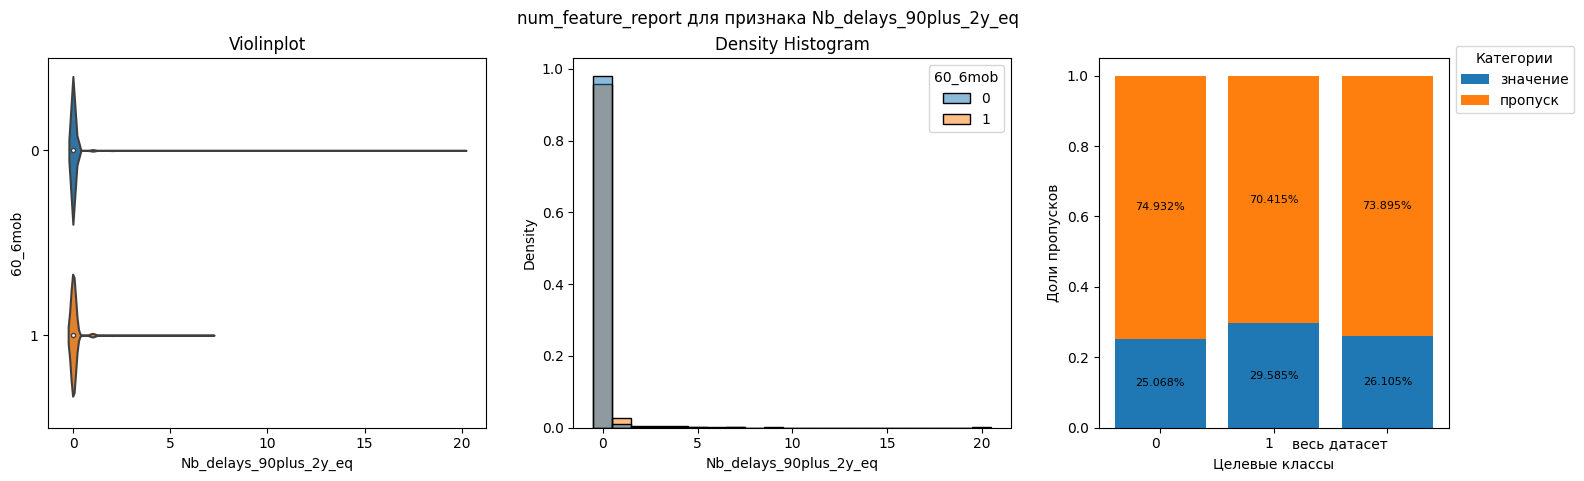

In [74]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='Nb_delays_90plus_2y_eq',
    target_colname='60_6mob',
    histplot_args={'discrete':True}
)

### `Max_overdue_eq` - Максимальная просрочка в днях		

In [79]:
equifax['Max_overdue_eq'].value_counts()

Max_overdue_eq
0.0      3461
5.0        12
11.0        7
14.0        6
10.0        5
         ... 
74.0        1
19.0        1
127.0       1
94.0        1
105.0       1
Name: count, Length: 85, dtype: int64

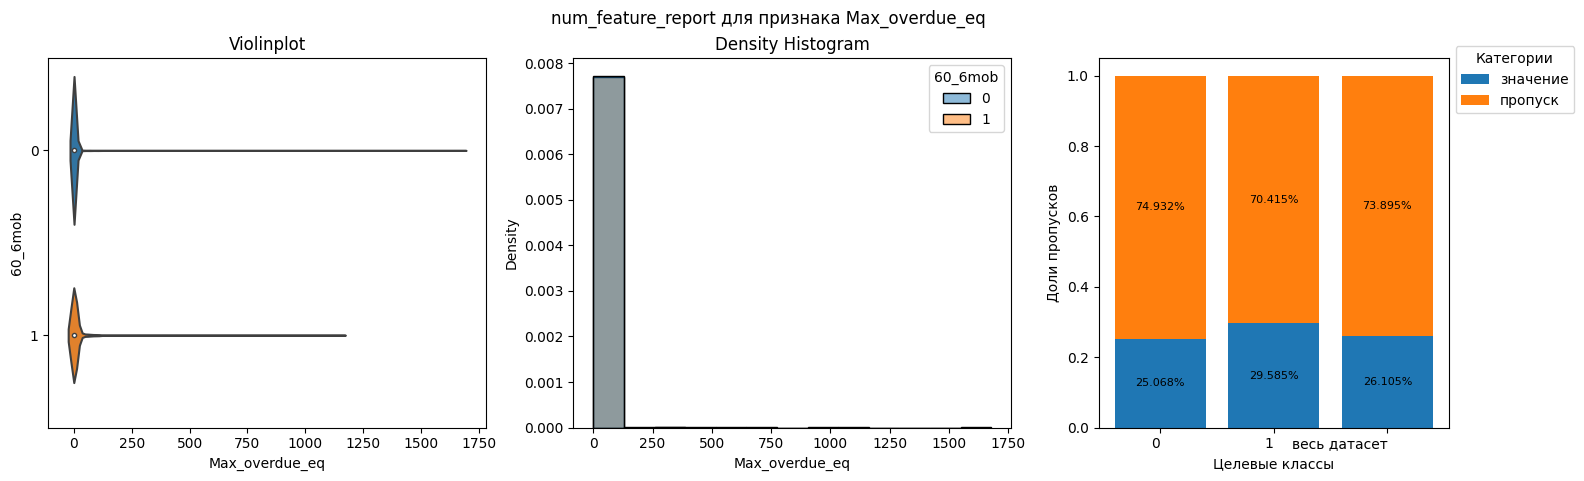

In [80]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='Max_overdue_eq',
    target_colname='60_6mob',
#     histplot_args={'discrete':True}
)

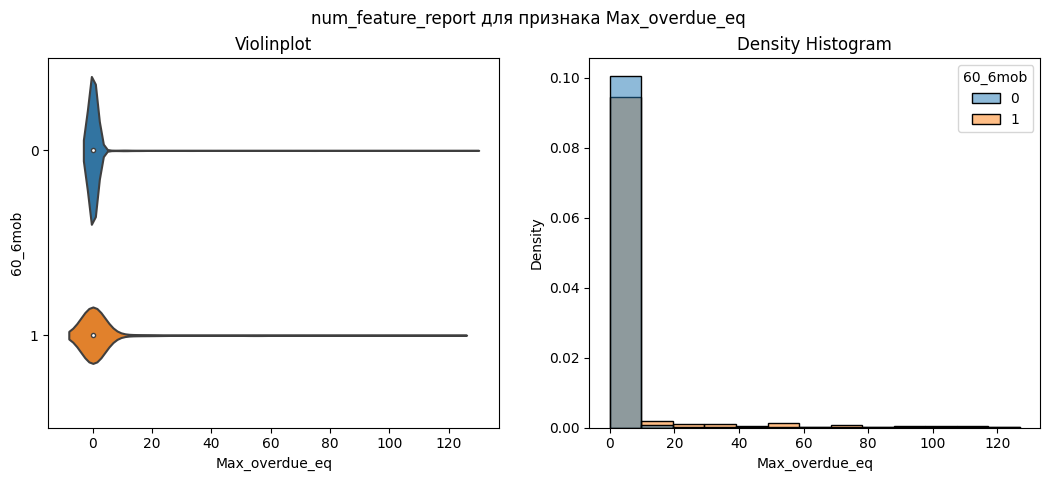

In [76]:
fig, axes = num_feature_report(
    equifax.query('Max_overdue_eq <= 150'),
    feature_colname='Max_overdue_eq',
    target_colname='60_6mob',
#     histplot_args={'discrete':True}
)

### `RCC_credit_limit_eq` - Лимит по активным кредитным картам

In [82]:
equifax['RCC_credit_limit_eq'].value_counts()

RCC_credit_limit_eq
0.0        3604
15000.0      15
Name: count, dtype: int64

In [83]:
cols_to_drop.append('RCC_credit_limit_eq')

### `RCC_overdue_amount_eq` - Общая сумма задолженности по кредитным картам

In [84]:
equifax['RCC_overdue_amount_eq'].value_counts()

RCC_overdue_amount_eq
0.0        3613
15000.0       5
10000.0       1
Name: count, dtype: int64

In [86]:
cols_to_drop.append('RCC_overdue_amount_eq')

### `Nb_active_consumer_credit_eq` - Количество активных потреб кредитов

In [88]:
# тоже бы дропнул
equifax['Nb_active_consumer_credit_eq'].value_counts()

Nb_active_consumer_credit_eq
0.0    3612
1.0       7
Name: count, dtype: int64

In [89]:
cols_to_drop.append('Nb_active_consumer_credit_eq')

### `Nb_active_rcc_eq` - Количество активных карт

In [91]:
# тоже бы дропнул
equifax['Nb_active_rcc_eq'].value_counts()

Nb_active_rcc_eq
0.0    3600
1.0      19
Name: count, dtype: int64

In [92]:
cols_to_drop.append('Nb_active_rcc_eq')

### `Nb_active_mortgages_eq` - Количество активных ипотечных кредитов

In [93]:
# тоже бы дропнул
equifax['Nb_active_mortgages_eq'].value_counts()

Nb_active_mortgages_eq
0.0    3612
1.0       7
Name: count, dtype: int64

In [94]:
cols_to_drop.append('Nb_active_mortgages_eq')

### `Nb_microcredits_ever` - Количество микрокредитов за все время		

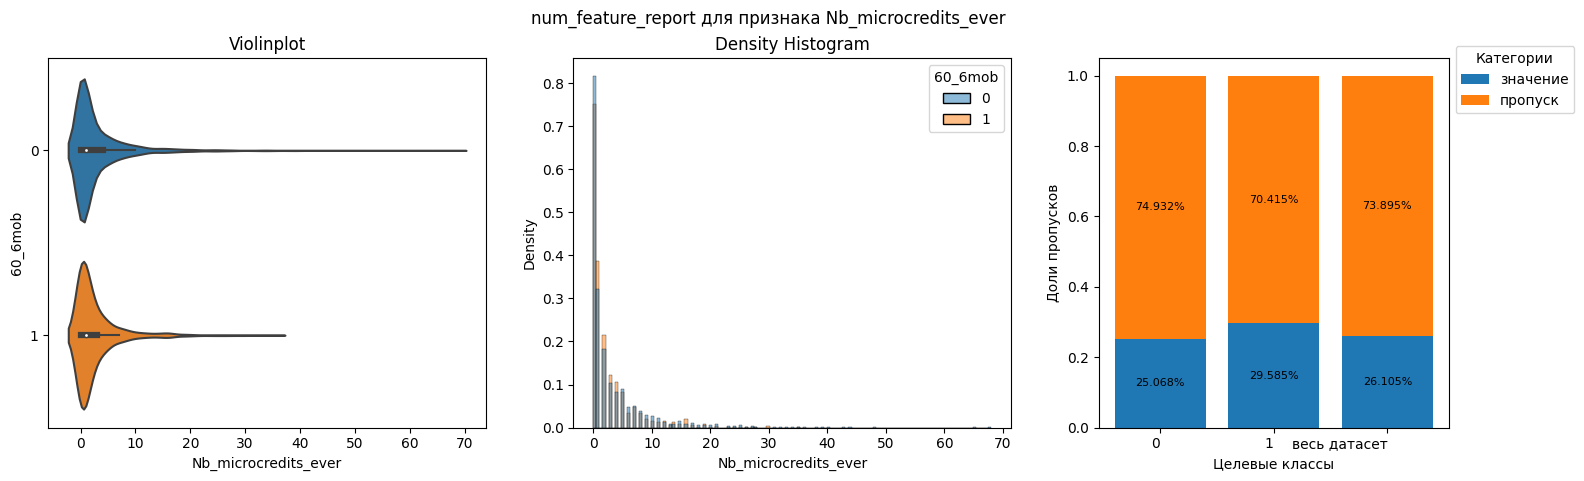

In [95]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='Nb_microcredits_ever',
    target_colname='60_6mob',
)

### `CH_length_eq` - Длина кредитной истории			

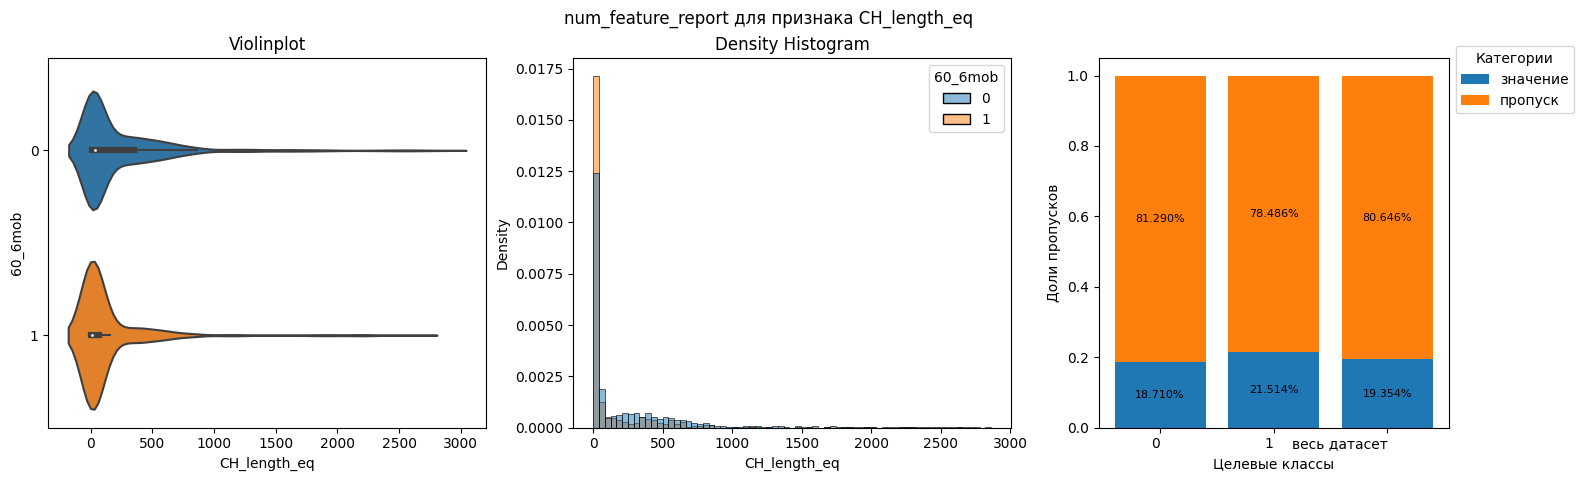

In [100]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='CH_length_eq',
    target_colname='60_6mob',
)

### `Nb_active_microcredits_eq` - ?		

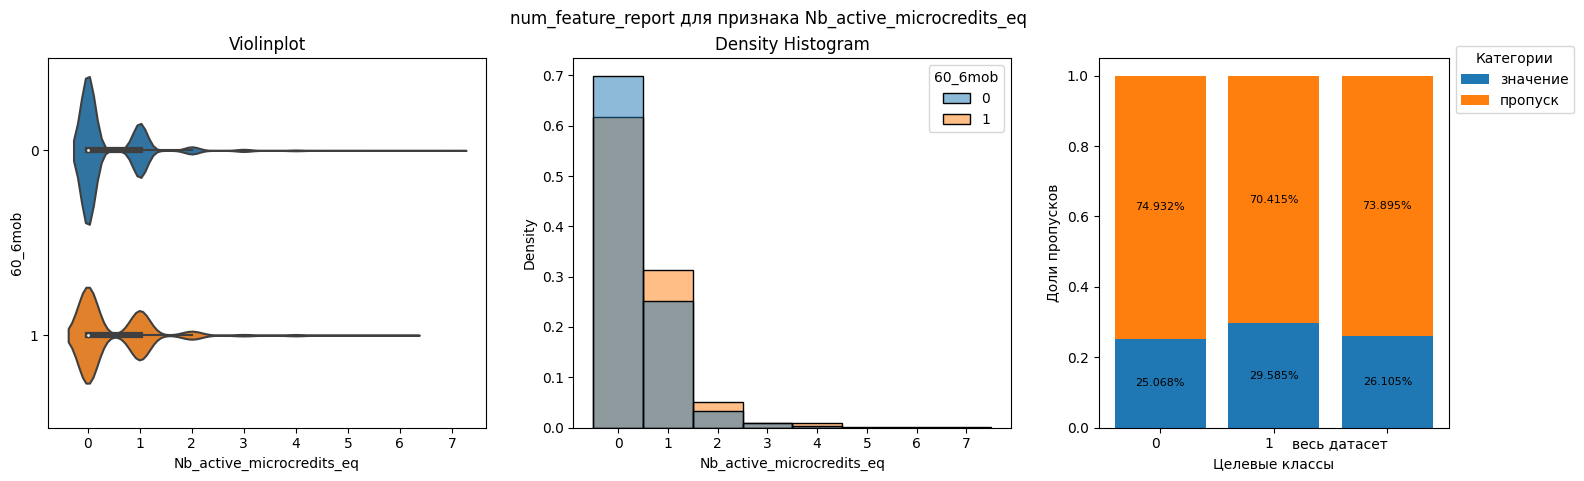

In [101]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='Nb_active_microcredits_eq',
    target_colname='60_6mob',
    histplot_args={'discrete':True}
)

### `S_hare_active_credit` - Доля активных микрокредитов от всех

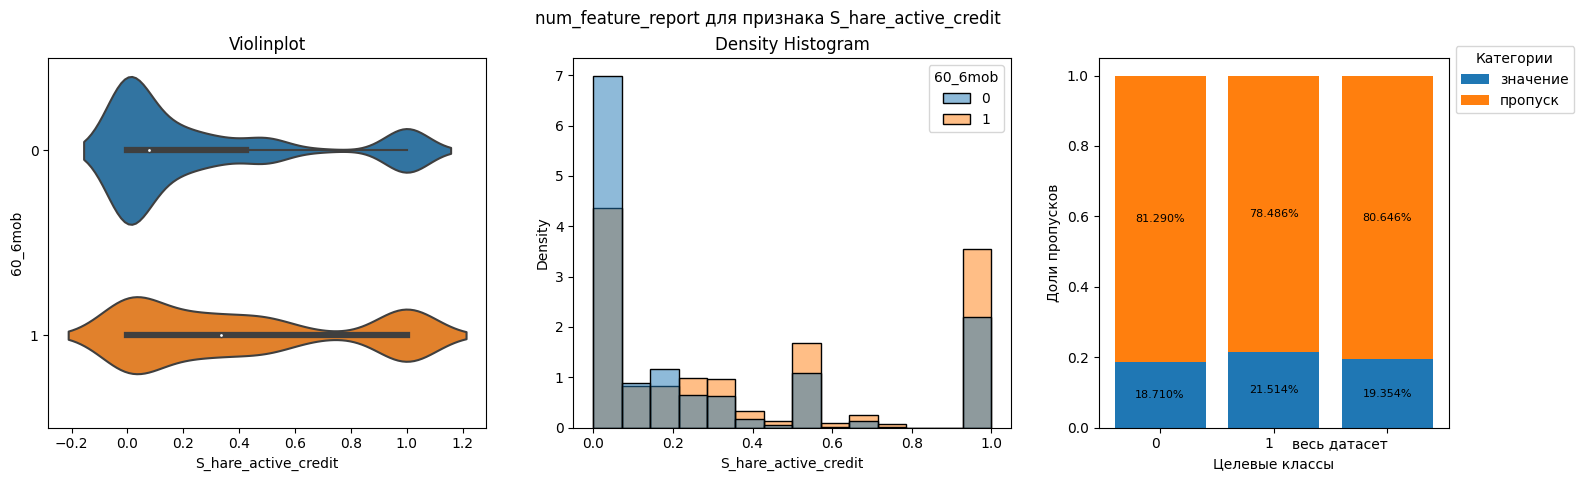

In [102]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='S_hare_active_credit',
    target_colname='60_6mob',
)

### `S_hare_micro` - Доля микрокредитов ко всем кредитам

In [105]:
equifax['S_hare_micro'].value_counts()

S_hare_micro
1.0000    1315
0.0000     564
0.5000     183
0.6667     122
0.7500      76
          ... 
0.8500       1
0.8696       1
0.4286       1
0.9796       1
0.9778       1
Name: count, Length: 77, dtype: int64

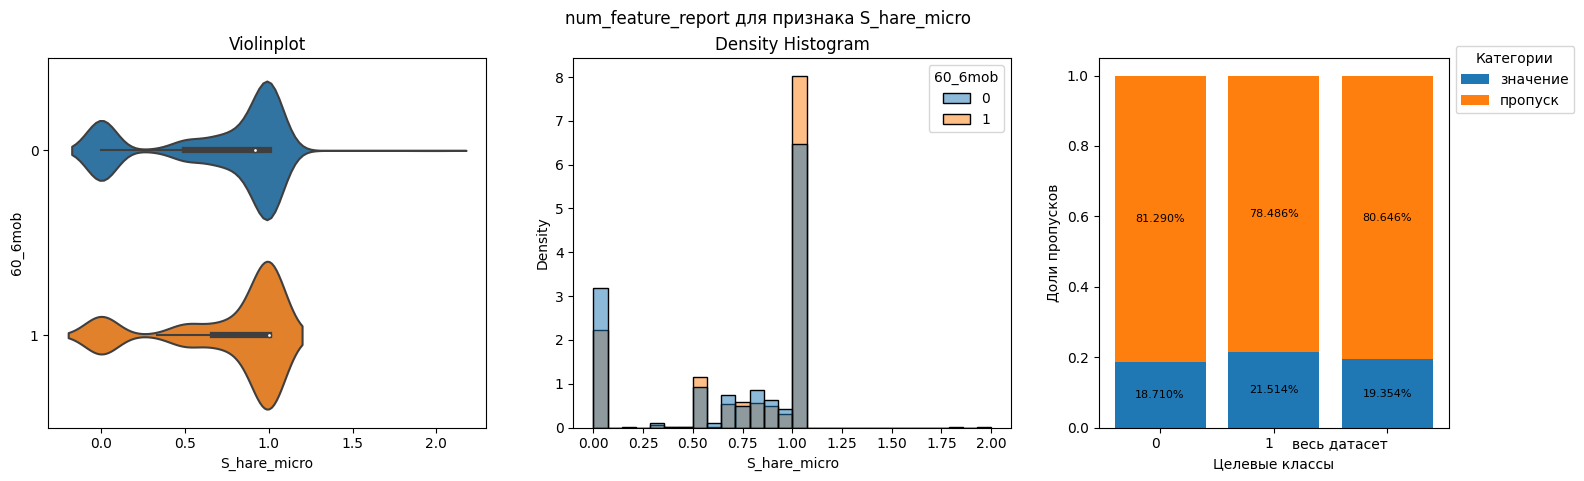

In [106]:
fig, axes = num_feature_report(
    equifax,
    feature_colname='S_hare_micro',
    target_colname='60_6mob',
#     histplot_args={'discrete':True}
)

In [111]:
cols_to_drop.extend(['Timestamp_eq', 'Oldest_account_date_eq', 'Recent_account_date_eq', 'dtstart'])

In [119]:
dropped = equifax.drop(cols_to_drop, axis=1)

## Корреляции

In [120]:
equifax_corr = dropped.astype('float')

### Pearson

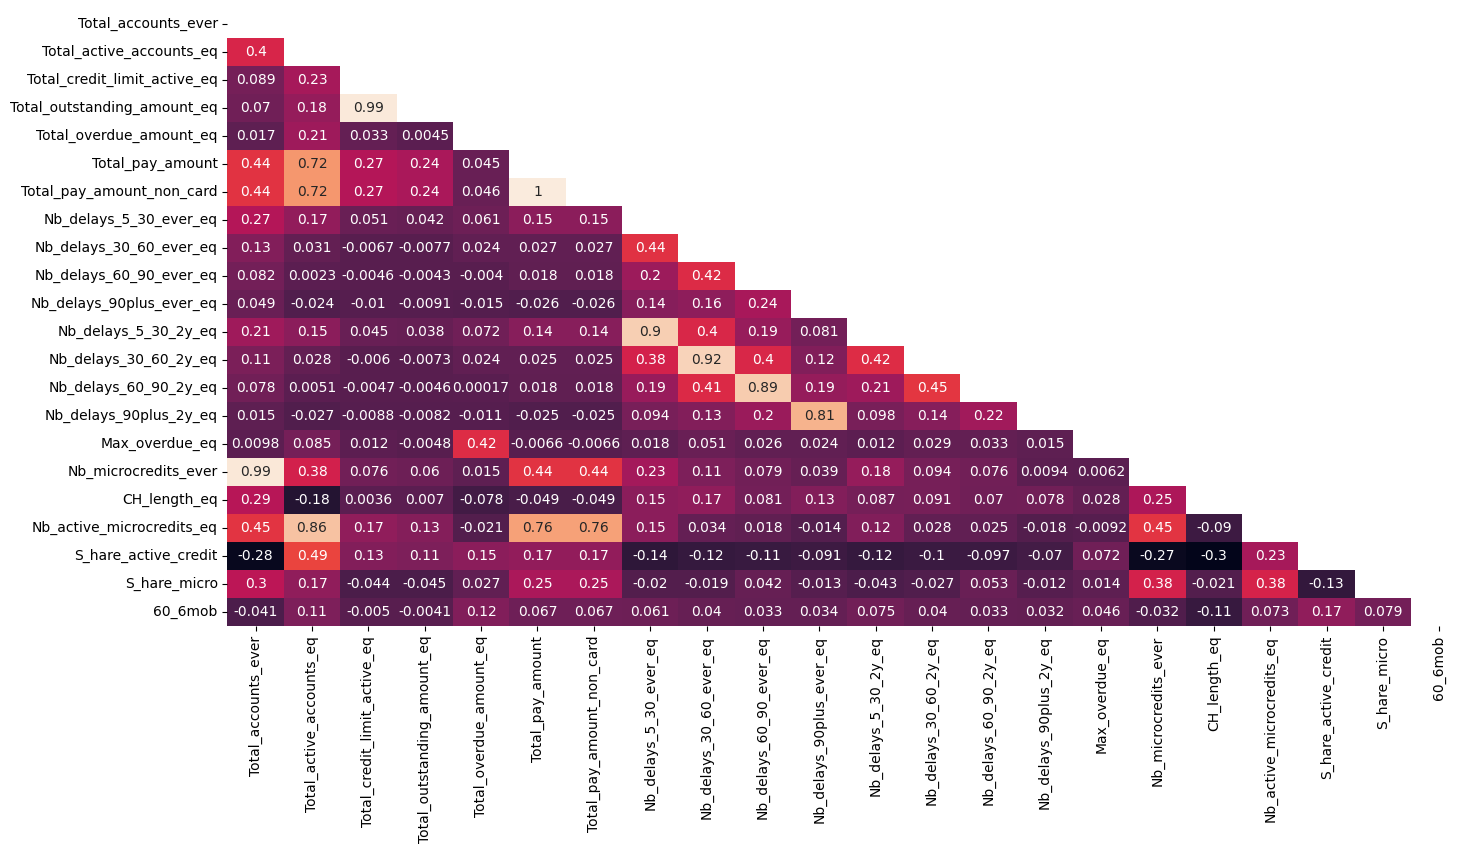

In [123]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(
    equifax_corr.corr(method='pearson'),
    mask=np.triu(np.ones_like(equifax_corr.corr(), dtype=bool)),
    annot=True,
    cbar=False,
)
plt.show()

In [151]:
to_drop = [
    'Total_accounts_ever',
    'Total_outstanding_amount_eq',
    'Total_pay_amount_non_card',
    'Total_pay_amount',
    'Nb_delays_5_30_2y_eq',
    'Nb_delays_30_60_2y_eq',
    'Nb_delays_60_90_2y_eq',
    'Nb_delays_90plus_2y_eq',
    'Nb_active_microcredits_eq',
    
]

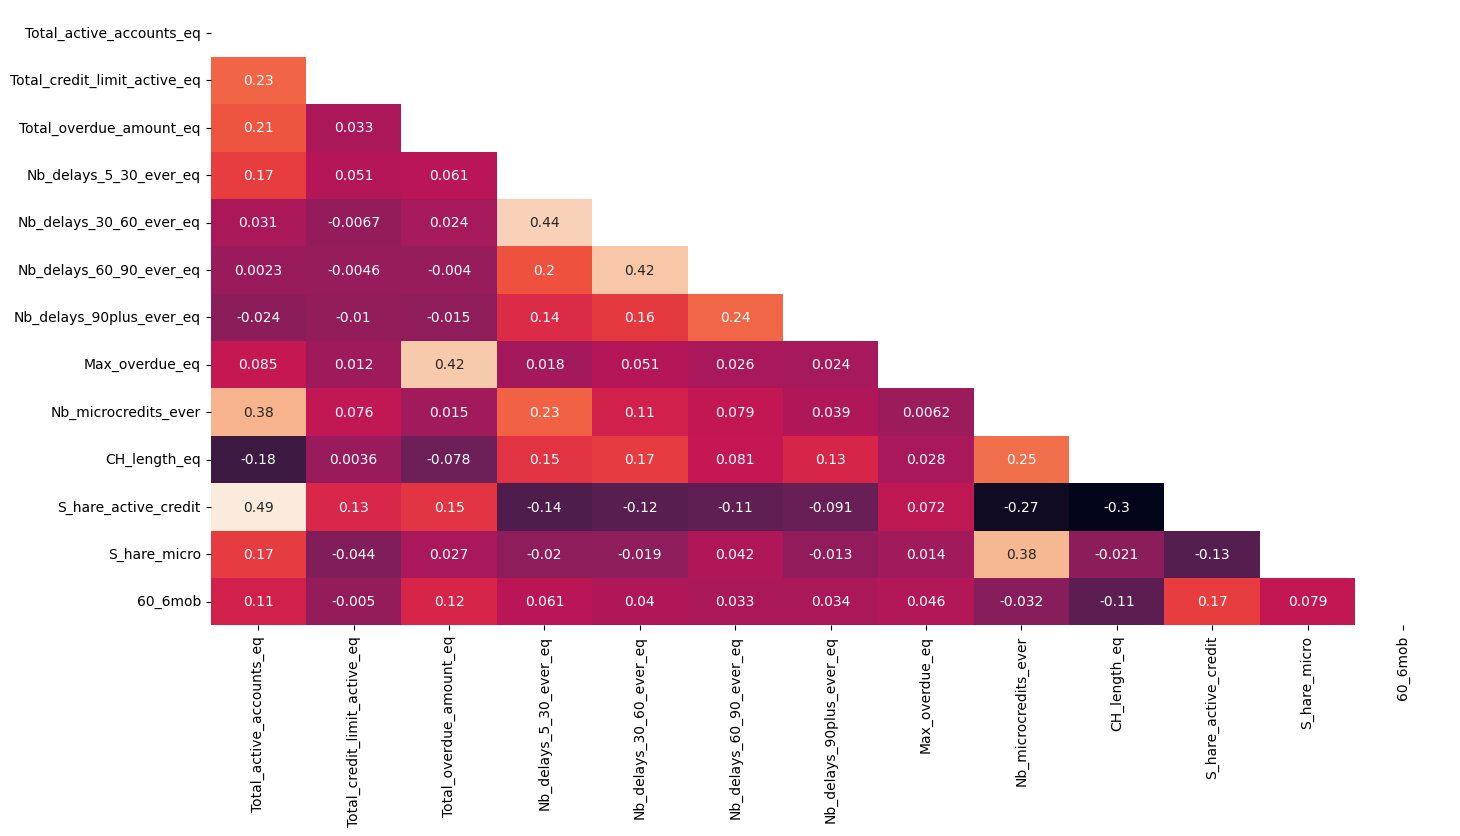

In [152]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(
    equifax_corr.drop(to_drop,axis=1).corr(method='pearson'),
    mask=np.triu(np.ones_like(equifax_corr.drop(to_drop,axis=1).corr(), dtype=bool)),
    annot=True,
    cbar=False,
)
plt.show()

### Spearman

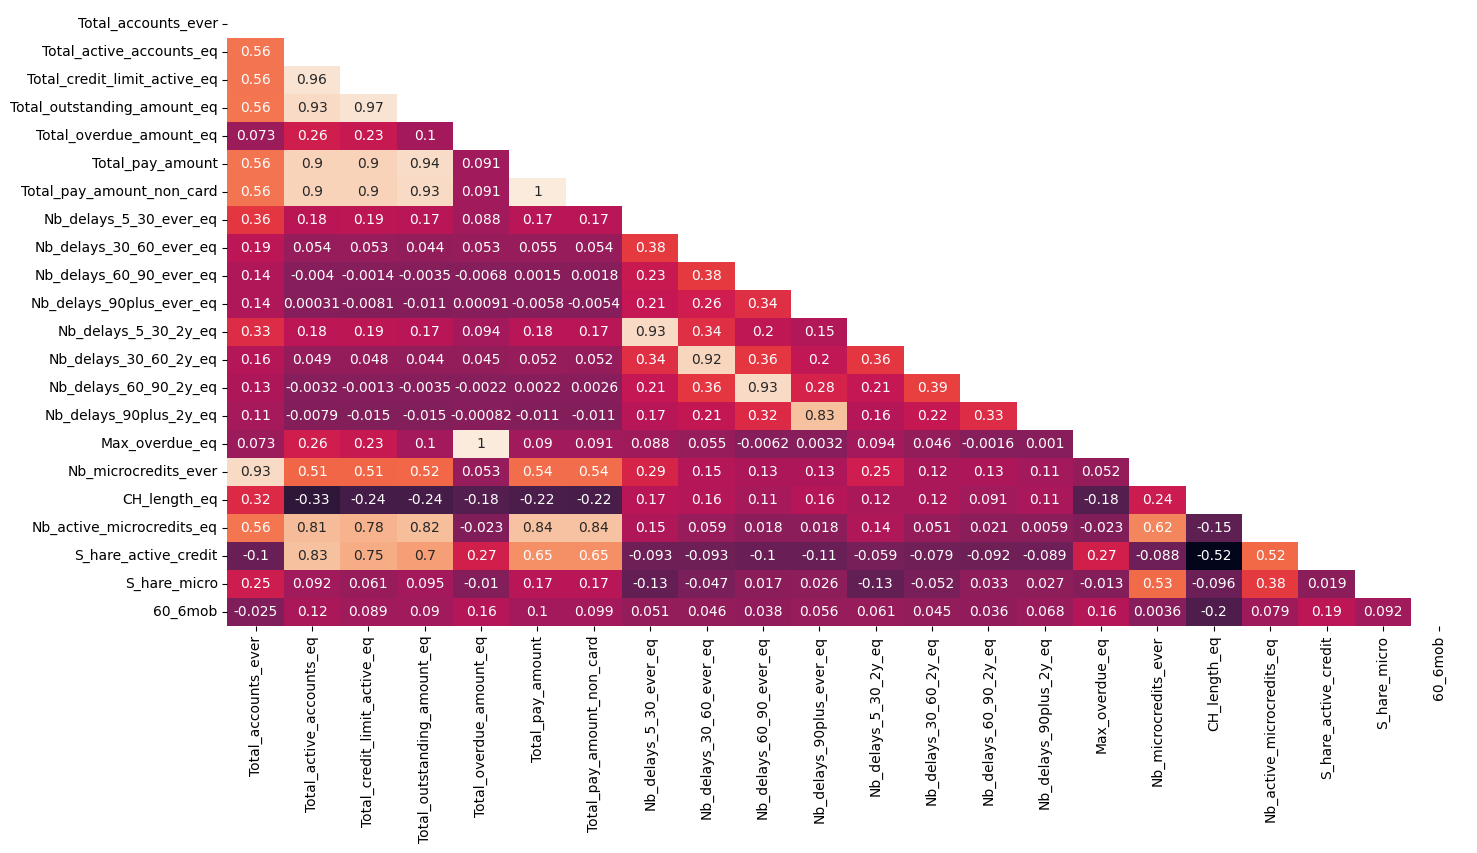

In [154]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(
    equifax_corr.corr(method='spearman'),
    mask=np.triu(np.ones_like(equifax_corr.corr(), dtype=bool)),
    annot=True,
    cbar=False,
)
plt.show()

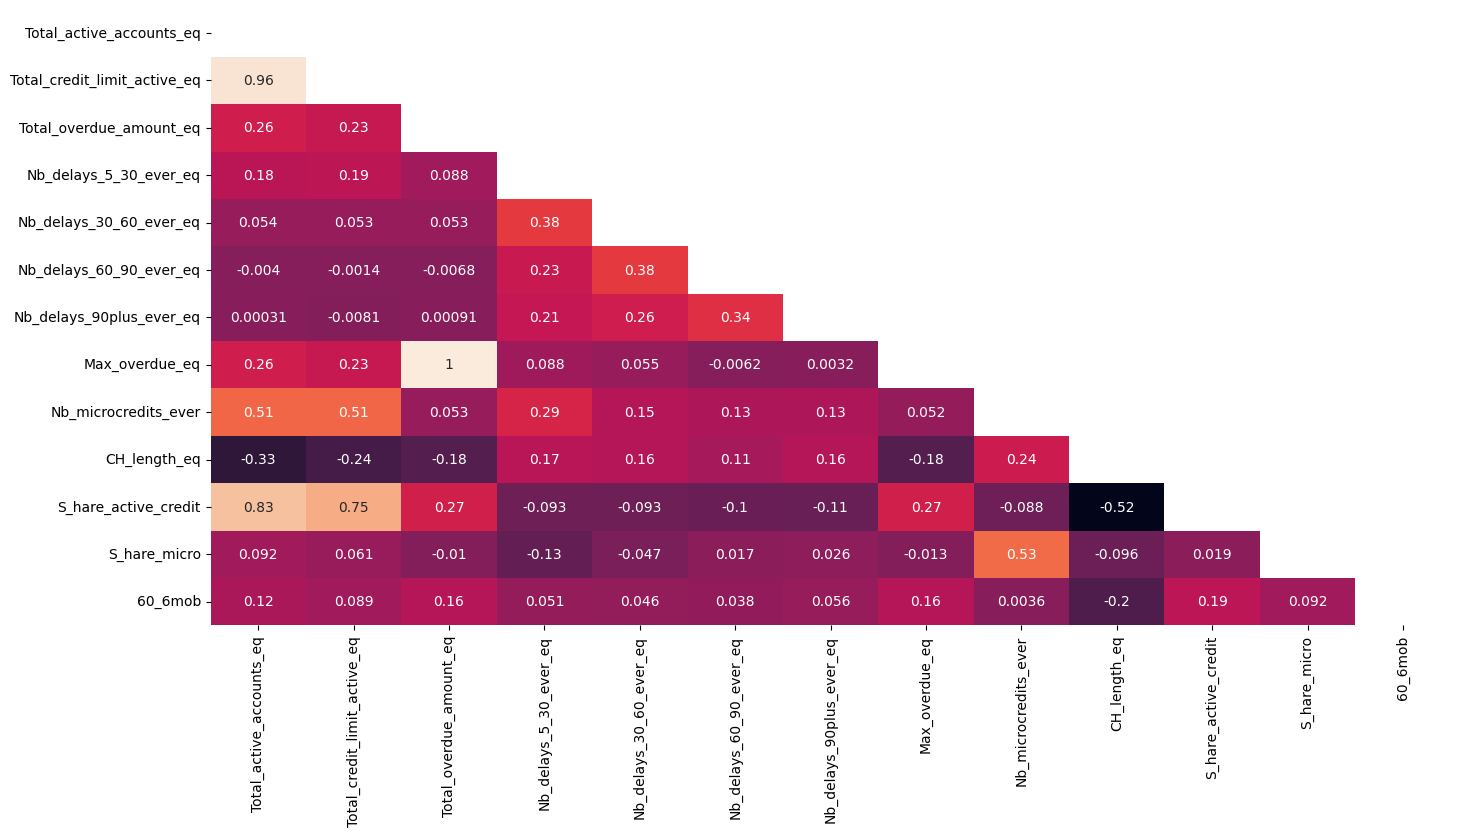

In [153]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(
    equifax_corr.drop(to_drop,axis=1).corr(method='spearman'),
    mask=np.triu(np.ones_like(equifax_corr.drop(to_drop,axis=1).corr(), dtype=bool)),
    annot=True,
    cbar=False,
)
plt.show()

In [156]:
equifax_corr.drop(to_drop,axis=1).columns.to_list()

['Total_active_accounts_eq',
 'Total_credit_limit_active_eq',
 'Total_overdue_amount_eq',
 'Nb_delays_5_30_ever_eq',
 'Nb_delays_30_60_ever_eq',
 'Nb_delays_60_90_ever_eq',
 'Nb_delays_90plus_ever_eq',
 'Max_overdue_eq',
 'Nb_microcredits_ever',
 'CH_length_eq',
 'S_hare_active_credit',
 'S_hare_micro',
 '60_6mob']